In [1]:
#importing local classes
import DataParser
#importing libraries
import os
import pandas as pd
import librosa
import librosa.display as librosa_display
import matplotlib.pyplot as plt
import contextlib
import wave
#%matplotlib inline

In [2]:
data_parser = DataParser.DataParser()
random_file_pathes_for_each_number = list()
for i in range(5):
    random_file_path = data_parser.return_one_random_path_file(True, i+1)
    random_file_pathes_for_each_number.append(random_file_path)

In [3]:
random_file_path = random_file_pathes_for_each_number[1]
random_file_data_numpy, sampling_rate = librosa.load(random_file_path, sr=16000)
print(random_file_data_numpy)

[0.         0.         0.         ... 0.0011228  0.00112559 0.        ]


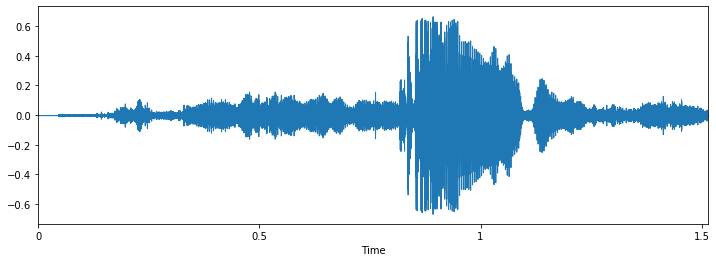

In [4]:
plt.figure(figsize=(12, 4))
librosa_display.waveplot(random_file_data_numpy, sr=sampling_rate)

In [5]:
import VAD
vad_class = VAD.VAD()
random_file_data_numpy_no_silence = vad_class.remove_silences(random_file_data_numpy,0.25)

0.6674231


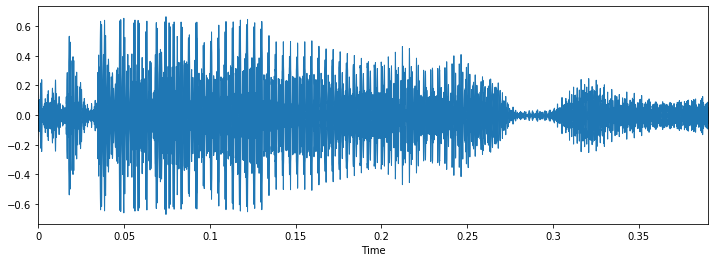

In [6]:
plt.figure(figsize=(12, 4))
librosa_display.waveplot(random_file_data_numpy_no_silence, sr=sampling_rate)

In [7]:
import IPython.display as ipd
ipd.Audio(random_file_data_numpy_no_silence, rate=sampling_rate)

In [8]:
import numpy as np
from scipy import signal
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [9]:
freqs, times, spectrogram = log_specgram(random_file_data_numpy_no_silence, sampling_rate)

In [10]:
print(spectrogram)

[[-19.26572  -16.556938 -14.683541 ... -23.014458 -23.025185 -23.02585 ]
 [-18.40225  -17.238485 -15.526645 ... -22.924206 -22.995901 -23.017904]
 [-17.546072 -15.070409 -15.03684  ... -22.922937 -23.01562  -23.025461]
 ...
 [-21.731361 -20.51727  -20.121784 ... -23.021412 -23.025034 -23.025595]
 [-20.608974 -21.11947  -18.614687 ... -23.020279 -23.02431  -23.025822]
 [-21.298288 -21.233767 -20.196651 ... -23.025658 -23.017456 -23.012291]]


Text(0.5, 0, 'Seconds')

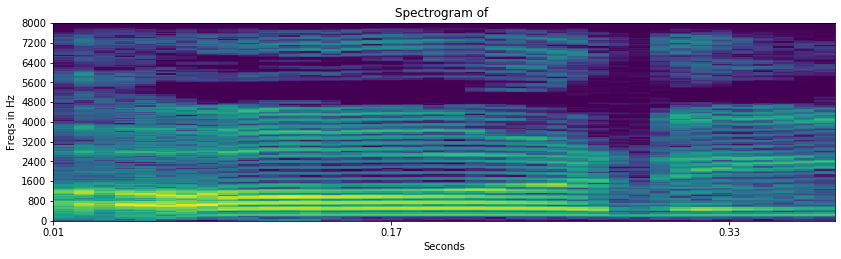

In [11]:
fig = plt.figure(figsize=(14, 8))
#ax1 = fig.add_subplot(211)
#ax1.set_title('Raw wave of ')
#ax1.set_ylabel('Amplitude')
#ax1.plot(np.linspace(0, sampling_rate/len(random_file_data_numpy_no_silence), sampling_rate), random_file_data_numpy_no_silence)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [12]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [13]:
print(spectrogram.shape)

(38, 161)
